In [4]:
import pandas as pd
import matplotlib.pyplot as plt

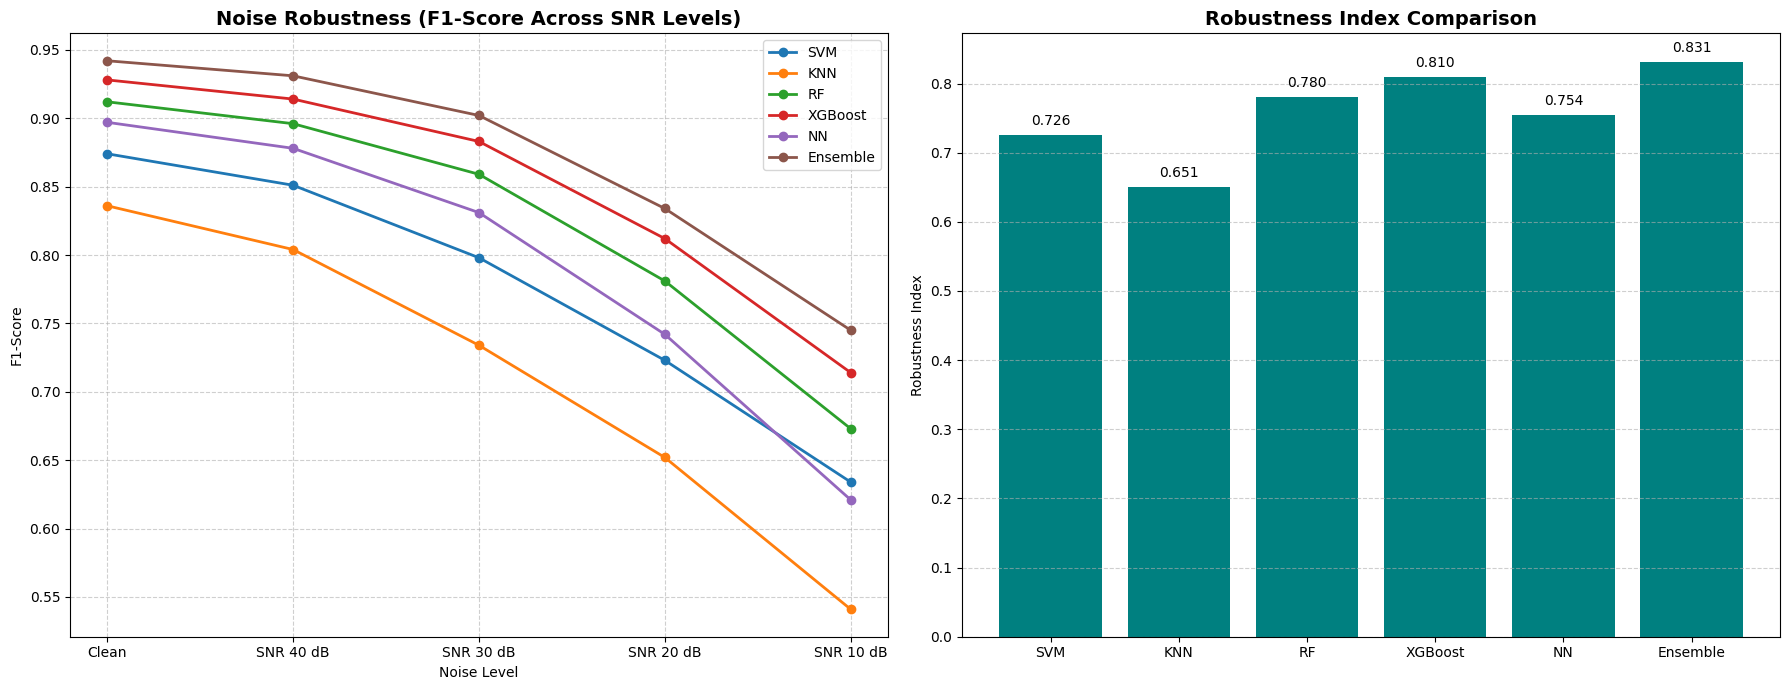

In [5]:
data_noise = {
    "Algorithm": ["SVM", "KNN", "RF", "XGBoost", "NN", "Ensemble"],
    "Clean": [0.874, 0.836, 0.912, 0.928, 0.897, 0.942],
    "SNR 40 dB": [0.851, 0.804, 0.896, 0.914, 0.878, 0.931],
    "SNR 30 dB": [0.798, 0.734, 0.859, 0.883, 0.831, 0.902],
    "SNR 20 dB": [0.723, 0.652, 0.781, 0.812, 0.742, 0.834],
    "SNR 10 dB": [0.634, 0.541, 0.673, 0.714, 0.621, 0.745],
    "Robustness Index": [0.726, 0.651, 0.780, 0.810, 0.754, 0.831]
}

df_noise = pd.DataFrame(data_noise)

# --- Plotting combined figure ---
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Line chart: F1-Score vs Noise Level
snr_columns = ["Clean", "SNR 40 dB", "SNR 30 dB", "SNR 20 dB", "SNR 10 dB"]
for i, row in df_noise.iterrows():
    axs[0].plot(snr_columns, row[snr_columns], marker="o", linewidth=2, label=row["Algorithm"])

axs[0].set_title("Noise Robustness (F1-Score Across SNR Levels)", fontsize=14, fontweight="bold")
axs[0].set_ylabel("F1-Score")
axs[0].set_xlabel("Noise Level")
axs[0].grid(True, linestyle="--", alpha=0.6)
axs[0].legend()

# Bar chart: Robustness Index
bars = axs[1].bar(df_noise["Algorithm"], df_noise["Robustness Index"], color="teal")
axs[1].set_title("Robustness Index Comparison", fontsize=14, fontweight="bold")
axs[1].set_ylabel("Robustness Index")
axs[1].grid(axis="y", linestyle="--", alpha=0.6)

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}", 
                ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()